In [1]:
#Include packages and builtin classes
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the csv file to be considered for Multi-classification
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=names)

In [3]:
# Seperate the input features and target from the dataset
# Takes first 4 columns and assign them to variable "X"
X = irisdata.iloc[:, 0:4]
# Takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = irisdata.select_dtypes(include=[object])
X.head()
y.head()
# y actually contains all categories or classes:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
 #Transform the categorial into numerical values
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [5]:
#Split the data  for training  and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [6]:
#Normalize the input features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [8]:
#Train the classifier 
mlp.fit(X_train, y_train.values.ravel())
predictions = mlp.predict(X_test)
print(predictions)

[1 2 2 2 0 0 2 0 0 2 0 0 2 1 2 2 1 2 2 1 0 1 0 0 1 2 0 1 2 0]


In [9]:
#  Evaluation of algorithm performance in classifying.
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[11  0  0]
 [ 0  7  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.78      0.88         9
           2       0.83      1.00      0.91        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



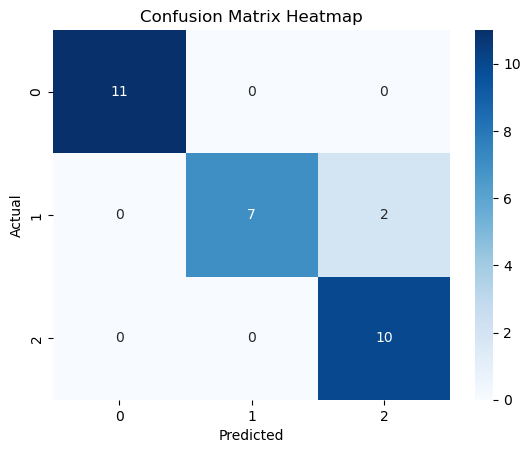

In [10]:
sns.heatmap(confusion_matrix(y_test,predictions),cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [11]:
df=irisdata
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
a = df.iloc[:, 0:4]
b = df.select_dtypes(include=[object])
b = df.iloc[:,4:5]

In [13]:
training_a, testing_a, training_b, testing_b = train_test_split(a, b, test_size = 0.25)
myscaler = StandardScaler()
myscaler.fit(training_a)
training_a = myscaler.transform(training_a)
testing_a = myscaler.transform(testing_a)
m1 = MLPClassifier(hidden_layer_sizes=(12, 13, 14), activation='relu', solver='adam', max_iter=2500)
m1.fit(training_a, training_b.values.ravel())

,hidden_layer_sizes,"(12, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2500
,shuffle,True
,random_state,None


In [14]:
predicted_values = m1.predict(testing_a)
print(confusion_matrix(testing_b,predicted_values))
print(classification_report(testing_b,predicted_values))


[[13  0  0]
 [ 0 15  2]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.78      0.88      0.82         8

       accuracy                           0.92        38
      macro avg       0.91      0.92      0.91        38
   weighted avg       0.93      0.92      0.92        38



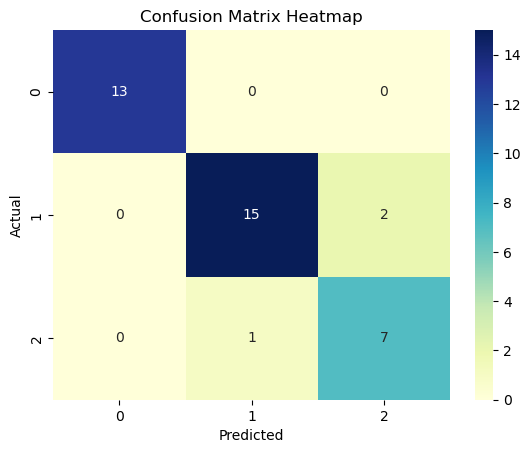

In [15]:
sns.heatmap(confusion_matrix(testing_b,predicted_values),cmap='YlGnBu',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()